In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
palette = ["#0076BB", "#F5BC47", "#000000", "#3DBBF2", "#FFD46E", 
           "#404040", "#7CD2F7", "#FFE09E", "#808080", "#BBE6FA", 
           "#FFF0CF", "#BFBFBF"]

sns.set_style("whitegrid")
sns.set_palette(palette, 12)

In [54]:
verdbolga = pd.read_csv('verdbolga.csv') 
lan = pd.read_csv('lan.csv') 
df = pd.read_csv('kaupskra.csv', usecols=('faerslunumer', 'postnr', 'sveitarfelag', 'utgdag', 'kaupverd', 'fasteignamat', 'byggar', 'einflm', 'lod_flm', 'tegund', 'fullbuid', 'onothaefur_samningur')) 
rvk_vis = pd.read_csv('visitala_rvk.csv')

In [55]:
verdbolga['date'] = pd.to_datetime(verdbolga['date'])
verdbolga.head()

,Unnamed: 0,date,verdbolga
0,0,2006-01-01,231.5
1,1,2006-02-01,230.9
2,2,2006-03-01,233.6
3,3,2006-04-01,236.1
4,4,2006-05-01,239.6


In [56]:
lan['man-ar'] = pd.to_datetime(lan['man-ar'])
lan.head()

,Unnamed: 0,man-ar,overdtryggt,verdtryggt
0,49,2006-01-01,12.5,4.15
1,50,2006-02-01,12.5,4.15
2,51,2006-03-01,12.5,4.15
3,52,2006-04-01,12.5,4.30
4,53,2006-05-01,13.0,4.60


In [57]:
df['utgdag'] = df['utgdag'].str[:-4]
df['utgdag'] = pd.to_datetime(df['utgdag'])
df.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur
0,569113,200.0,Kópavogsbær,2012-07-30,87000,70850,1985,780.4,1105.0,Atvinnuhusnaedi,1,0
1,558760,220.0,Hafnarfjarðarkaupstaður,2011-02-28,36000,40790,1983,400.0,3000.0,Atvinnuhusnaedi,1,0
2,566833,104.0,Reykjavíkurborg,2012-04-16,31000,4679,1962,310.2,565.0,Atvinnuhusnaedi,1,1
3,566833,104.0,Reykjavíkurborg,2012-04-16,31000,5516,1962,310.2,565.0,Atvinnuhusnaedi,1,1
4,628860,104.0,Reykjavíkurborg,2018-02-20,23500,13200,1962,71.4,565.0,Atvinnuhusnaedi,1,0


In [58]:
df['month'] = df['utgdag'].dt.to_period('M') # Function til að gera þetta mánaðarskipt

In [59]:
df.dtypes

faerslunumer                     int64
postnr                         float64
sveitarfelag                    object
utgdag                  datetime64[ns]
kaupverd                         int64
fasteignamat                     int64
byggar                          object
einflm                         float64
lod_flm                        float64
tegund                          object
fullbuid                         int64
onothaefur_samningur             int64
month                        period[M]
dtype: object

In [60]:
df.sort_values('utgdag', inplace=True)
df.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur,month
61222,526951,810.0,Hveragerðisbær,2006-01-20,14800,10955,1930,137.2,1343.2,Serbyli,1,1,2006-01
8225,535421,103.0,Reykjavíkurborg,2006-01-31,17411,21475,2007,89.5,10484.0,Fjolbyli,1,1,2006-01
32305,511099,700.0,Múlaþing,2006-02-02,396000,44540,1977,2412.9,11903.0,Atvinnuhusnaedi,1,1,2006-02
84132,511101,700.0,Múlaþing,2006-02-02,396000,53590,1966,2412.9,11903.0,Atvinnuhusnaedi,1,1,2006-02
32306,511101,700.0,Múlaþing,2006-02-02,396000,44540,1977,2412.9,11903.0,Atvinnuhusnaedi,1,1,2006-02


In [61]:
merged = pd.concat([df,lan])
merged.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur,month,Unnamed: 0,man-ar,overdtryggt,verdtryggt
61222,526951.0,810.0,Hveragerðisbær,2006-01-20,14800.0,10955.0,1930,137.2,1343.2,Serbyli,1.0,1.0,2006-01,NaN,NaT,NaN,NaN
8225,535421.0,103.0,Reykjavíkurborg,2006-01-31,17411.0,21475.0,2007,89.5,10484.0,Fjolbyli,1.0,1.0,2006-01,NaN,NaT,NaN,NaN
32305,511099.0,700.0,Múlaþing,2006-02-02,396000.0,44540.0,1977,2412.9,11903.0,Atvinnuhusnaedi,1.0,1.0,2006-02,NaN,NaT,NaN,NaN
84132,511101.0,700.0,Múlaþing,2006-02-02,396000.0,53590.0,1966,2412.9,11903.0,Atvinnuhusnaedi,1.0,1.0,2006-02,NaN,NaT,NaN,NaN
32306,511101.0,700.0,Múlaþing,2006-02-02,396000.0,44540.0,1977,2412.9,11903.0,Atvinnuhusnaedi,1.0,1.0,2006-02,NaN,NaT,NaN,NaN


In [62]:
#a = pd.merge(lan, verdbolga, left_on = 'man-ar', right_on = 'date')
#a.head()



In [63]:
c = lan
c.columns.values[1] = 'date'
c.head()


,Unnamed: 0,date,overdtryggt,verdtryggt
0,49,2006-01-01,12.5,4.15
1,50,2006-02-01,12.5,4.15
2,51,2006-03-01,12.5,4.15
3,52,2006-04-01,12.5,4.30
4,53,2006-05-01,13.0,4.60


In [64]:
lan.dtypes

Unnamed: 0              int64
date           datetime64[ns]
overdtryggt           float64
verdtryggt            float64
dtype: object

In [65]:
verdbolga.dtypes

Unnamed: 0             int64
date          datetime64[ns]
verdbolga            float64
dtype: object

In [66]:
lan.head()

,Unnamed: 0,date,overdtryggt,verdtryggt
0,49,2006-01-01,12.5,4.15
1,50,2006-02-01,12.5,4.15
2,51,2006-03-01,12.5,4.15
3,52,2006-04-01,12.5,4.30
4,53,2006-05-01,13.0,4.60


In [67]:
lan.rename(columns = {'man-ar':'date'}, inplace = True)

In [68]:
lanver = lan.merge(verdbolga, on='date', how='left')

In [69]:
lanver.head()

,Unnamed: 0_x,date,overdtryggt,verdtryggt,Unnamed: 0_y,verdbolga
0,49,2006-01-01,12.5,4.15,0,231.5
1,50,2006-02-01,12.5,4.15,1,230.9
2,51,2006-03-01,12.5,4.15,2,233.6
3,52,2006-04-01,12.5,4.30,3,236.1
4,53,2006-05-01,13.0,4.60,4,239.6


In [70]:
rvk_vis['date'] = pd.to_datetime(rvk_vis['date'])

In [71]:
lanvis = pd.merge(lanver, rvk_vis, how='left')

In [72]:
lanvis.tail()

,Unnamed: 0_x,date,overdtryggt,verdtryggt,Unnamed: 0_y,verdbolga,visitala_rvk,pct_change
192,257,2022-01-01,3.95,1.50,192,434.8,823.7,1.7
193,258,2022-02-01,4.15,1.50,193,440.3,844.0,2.5
194,259,2022-03-01,4.15,1.50,194,443.9,869.9,3.1
195,260,2022-04-01,4.15,1.49,195,448.3,893.6,2.7
196,261,2022-05-01,4.65,1.49,196,450.2,NaN,NaN


In [73]:
lanvis.ffill(axis=0)

,Unnamed: 0_x,date,overdtryggt,verdtryggt,Unnamed: 0_y,verdbolga,visitala_rvk,pct_change
0,49,2006-01-01,12.50,4.15,0,231.5,293.3,0.5
1,50,2006-02-01,12.50,4.15,1,230.9,299.1,2.0
2,51,2006-03-01,12.50,4.15,2,233.6,304.2,1.7
3,52,2006-04-01,12.50,4.30,3,236.1,307.7,1.2
4,53,2006-05-01,13.00,4.60,4,239.6,307.1,-0.2
...,...,...,...,...,...,...,...,...
192,257,2022-01-01,3.95,1.50,192,434.8,823.7,1.7
193,258,2022-02-01,4.15,1.50,193,440.3,844.0,2.5
194,259,2022-03-01,4.15,1.50,194,443.9,869.9,3.1
195,260,2022-04-01,4.15,1.49,195,448.3,893.6,2.7


In [74]:
lanvis['verdbolga_pct'] = lanvis['verdbolga'].pct_change()

In [75]:
lanvis = lanvis[['date', 'overdtryggt', 'verdtryggt', 'verdbolga', 'pct_change', 'verdbolga_pct']]

In [76]:
lanvis['verdbolga_%'] = lanvis['verdbolga_pct']*100
lanvis.head()

,date,overdtryggt,verdtryggt,verdbolga,pct_change,verdbolga_pct,verdbolga_%
0,2006-01-01,12.5,4.15,231.5,0.5,NaN,NaN
1,2006-02-01,12.5,4.15,230.9,2.0,-0.002592,-0.259179
2,2006-03-01,12.5,4.15,233.6,1.7,0.011693,1.169337
3,2006-04-01,12.5,4.30,236.1,1.2,0.010702,1.070205
4,2006-05-01,13.0,4.60,239.6,-0.2,0.014824,1.482423


In [77]:
lanvis = lanvis[['date', 'overdtryggt', 'verdtryggt', 'pct_change', 'verdbolga_%']]

<AxesSubplot:>

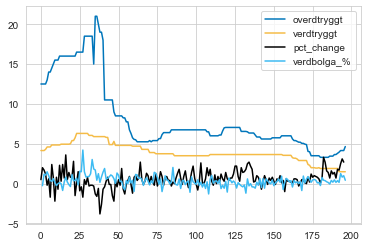

In [78]:
lanvis[['overdtryggt', 'verdtryggt', 'pct_change', 'verdbolga_%']].plot()

In [86]:
lanvis.tail()

,date,overdtryggt,verdtryggt,visitala_rvk_%,verdbolga_%
192,2022-01-01,3.95,1.50,1.7,0.161253
193,2022-02-01,4.15,1.50,2.5,1.264949
194,2022-03-01,4.15,1.50,3.1,0.817624
195,2022-04-01,4.15,1.49,2.7,0.991214
196,2022-05-01,4.65,1.49,2.7,0.423823


In [85]:
lanvis.rename(columns={'pct_change':'visitala_rvk_%'}, inplace=True)
lanvis.ffill(inplace=True)

In [81]:
lanvis.to_csv('merged_variables.csv')

In [82]:
df.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur,month
61222,526951,810.0,Hveragerðisbær,2006-01-20,14800,10955,1930,137.2,1343.2,Serbyli,1,1,2006-01
8225,535421,103.0,Reykjavíkurborg,2006-01-31,17411,21475,2007,89.5,10484.0,Fjolbyli,1,1,2006-01
32305,511099,700.0,Múlaþing,2006-02-02,396000,44540,1977,2412.9,11903.0,Atvinnuhusnaedi,1,1,2006-02
84132,511101,700.0,Múlaþing,2006-02-02,396000,53590,1966,2412.9,11903.0,Atvinnuhusnaedi,1,1,2006-02
32306,511101,700.0,Múlaþing,2006-02-02,396000,44540,1977,2412.9,11903.0,Atvinnuhusnaedi,1,1,2006-02
